In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pydotplus 
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('WineQT1.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7.2,0.415,0.36,2.0,0.081,13,45,0.9972,3.48,0.64,9.2,5,0
95,8.4,0.745,0.11,1.9,0.090,16,63,0.9965,3.19,0.82,9.6,5,1
96,5.2,0.340,0.00,1.8,0.050,27,63,0.9916,3.68,0.79,14.0,6,0
97,6.3,0.390,0.08,1.7,0.066,3,20,0.9954,3.34,0.58,9.4,5,1


In [3]:
df.shape

(99, 13)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         99 non-null     float64
 1   volatile acidity      99 non-null     float64
 2   citric acid           99 non-null     float64
 3   residual sugar        99 non-null     float64
 4   chlorides             99 non-null     float64
 5   free sulfur dioxide   99 non-null     int64  
 6   total sulfur dioxide  99 non-null     int64  
 7   density               99 non-null     float64
 8   pH                    99 non-null     float64
 9   sulphates             99 non-null     float64
 10  alcohol               99 non-null     float64
 11  quality               99 non-null     int64  
 12  Id                    99 non-null     int64  
dtypes: float64(9), int64(4)
memory usage: 10.2 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,7.607071,0.588788,0.194242,2.154545,0.092515,14.111111,53.232323,0.996542,3.340000,0.683737,9.889899,5.313131,0.454545
std,1.068114,0.196743,0.169423,0.725487,0.055177,8.321216,34.227578,0.001193,0.162148,0.267011,0.920459,0.649120,0.500464
min,4.600000,0.280000,0.000000,1.200000,0.045000,3.000000,10.000000,0.991600,2.930000,0.390000,9.000000,4.000000,0.000000
25%,7.150000,0.450000,0.050000,1.800000,0.075000,9.000000,23.500000,0.996200,3.225000,0.550000,9.400000,5.000000,0.000000
50%,7.800000,0.575000,0.170000,2.000000,0.081000,13.000000,47.000000,0.996600,3.340000,0.590000,9.600000,5.000000,0.000000
75%,8.100000,0.690000,0.280000,2.250000,0.090000,17.500000,67.000000,0.997200,3.425000,0.720000,10.150000,6.000000,1.000000
max,11.200000,1.330000,0.680000,5.900000,0.467000,42.000000,140.000000,0.998800,3.900000,1.950000,14.000000,7.000000,1.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df.value_counts().to_frame()

count
fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH   sulphates alcohol quality Id       
8.6           0.490            0.28        1.90           0.110     20                  136                  0.9972  2.93 1.95      9.9     6       0       2
7.7           0.490            0.26        1.90           0.062     9                   31                   0.9966  3.39 0.64      9.6     5       1       2
8.1           0.545            0.18        1.90           0.080     13                  35                   0.9972  3.30 0.59      9.0     6       0       2
8.4           0.745            0.11        1.90           0.090     16                  63                   0.9965  3.19 0.82      9.6     5       1       2
7.4           0.700            0.00        1.90           0.076     11                  34                   0.9978  3.51 0.56      9.4     5       0       2
...                                                                                                                                                       ...
7.3           0.450            0.36        5.90           0.074     12                  87                   0.9978  3.33 0.83      10.5    5       1       1
              0.390            0.31        2.40           0.074     9                   46                   0.9962  3.41 0.54      9.4     6       1       1
7.2           0.725            0.05        4.65           0.086     4                   11                   0.9962  3.41 0.39      10.9    5       1       1
                                                                                                                                                    0       1
11.2          0.280            0.56        1.90           0.075     17                  60                   0.9980  3.16 0.58      9.8     6       1       1

[92 rows x 1 columns]

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
x = df['quality']
y = df['quality']

In [11]:
 x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.586e+30
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:49:38   Log-Likelihood:                 3189.0
No. Observations:                  99   AIC:                            -6374.
Df Residuals:                      97   BIC:                            -6369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.217e-15   2.09e-15     -2.981      0.004   -1.04e-14   -2.08e-15
quality        1.0000    3.9e-16   2.57e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.756   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.828
Skew:                          -0.077   Prob(JB):                        0.661
Kurtosis:                       2.579   Cond. No.                         45.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# 1 LinearRegression
# SLR
x = df[['fixed acidity','volatile acidity','citric acid','residual sugar']]
y = df['Id']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(    fixed acidity  volatile acidity  citric acid  residual sugar
 49            7.7             0.690         0.22             1.9
 70            8.3             0.610         0.30             2.1
 68            7.6             0.900         0.06             2.5
 15            7.9             0.430         0.21             1.6
 39           10.2             0.420         0.57             3.4
 ..            ...               ...          ...             ...
 60            7.7             0.490         0.26             1.9
 71            8.1             0.545         0.18             1.9
 14            7.6             0.390         0.31             2.3
 92            7.9             1.040         0.05             2.2
 51            8.8             0.410         0.64             2.2
 
 [79 rows x 4 columns],
     fixed acidity  volatile acidity  citric acid  residual sugar
 62            7.0             0.620         0.08             1.8
 40            7.8             0.590         0.18 

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[0.44804785 0.45866175 0.56522727 0.27218929 0.25897532 0.40214468
 0.40109198 0.36133268 0.4139084  0.49843007 0.52370495 0.49894681
 0.50774587 0.45929894 0.53566208 0.49843007 0.49581177 0.29310354
 1.00243281 0.38661781]
62    0
40    0
95    1
18    1
97    1
84    0
64    0
42    0
10    1
0     0
31    1
76    1
47    1
26    1
44    0
4     0
22    0
12    0
88    1
73    0
Name: Id, dtype: int64


In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,7.2,0.415,0.36,2.0,0.081,13,45,0.9972,3.48,0.64,9.2,5,0
95,8.4,0.745,0.11,1.9,0.090,16,63,0.9965,3.19,0.82,9.6,5,1
96,5.2,0.340,0.00,1.8,0.050,27,63,0.9916,3.68,0.79,14.0,6,0
97,6.3,0.390,0.08,1.7,0.066,3,20,0.9954,3.34,0.58,9.4,5,1


In [17]:
# MLR
xtest = df[['chlorides','free sulfur dioxide','total sulfur dioxide','density']]
ytest = df[['quality']]

In [18]:
xtrain = df[['chlorides','free sulfur dioxide','total sulfur dioxide','density']]
ytrain = df[['quality']]

In [19]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train,x_test, y_train, y_test

(    fixed acidity  volatile acidity  citric acid  residual sugar
 49            7.7             0.690         0.22             1.9
 70            8.3             0.610         0.30             2.1
 68            7.6             0.900         0.06             2.5
 15            7.9             0.430         0.21             1.6
 39           10.2             0.420         0.57             3.4
 ..            ...               ...          ...             ...
 60            7.7             0.490         0.26             1.9
 71            8.1             0.545         0.18             1.9
 14            7.6             0.390         0.31             2.3
 92            7.9             1.040         0.05             2.2
 51            8.8             0.410         0.64             2.2
 
 [79 rows x 4 columns],
     fixed acidity  volatile acidity  citric acid  residual sugar
 62            7.0             0.620         0.08             1.8
 40            7.8             0.590         0.18 

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
model.predict(x_test)

array([0.44804785, 0.45866175, 0.56522727, 0.27218929, 0.25897532,
       0.40214468, 0.40109198, 0.36133268, 0.4139084 , 0.49843007,
       0.52370495, 0.49894681, 0.50774587, 0.45929894, 0.53566208,
       0.49843007, 0.49581177, 0.29310354, 1.00243281, 0.38661781])

In [22]:
print(y_pred)
print(y_test)

[0.44804785 0.45866175 0.56522727 0.27218929 0.25897532 0.40214468
 0.40109198 0.36133268 0.4139084  0.49843007 0.52370495 0.49894681
 0.50774587 0.45929894 0.53566208 0.49843007 0.49581177 0.29310354
 1.00243281 0.38661781]
62    0
40    0
95    1
18    1
97    1
84    0
64    0
42    0
10    1
0     0
31    1
76    1
47    1
26    1
44    0
4     0
22    0
12    0
88    1
73    0
Name: Id, dtype: int64


In [23]:
# 2 Logistic Regression 
x = df.drop(columns =[ 'total sulfur dioxide','Id'],axis =1 )
y = df['Id']
print(x)
print(y)

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
..            ...               ...          ...             ...        ...   
94            7.2             0.415         0.36             2.0      0.081   
95            8.4             0.745         0.11             1.9      0.090   
96            5.2             0.340         0.00             1.8      0.050   
97            6.3             0.390         0.08             1.7      0.066   
98            5.2             0.340         0.00             1.8      0.050   

    free sulfur dioxide  density    pH  sulphates  

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =42)
x_train,x_test, y_train, y_test

(    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 49            7.7             0.690         0.22             1.9      0.084   
 70            8.3             0.610         0.30             2.1      0.084   
 68            7.6             0.900         0.06             2.5      0.079   
 15            7.9             0.430         0.21             1.6      0.106   
 39           10.2             0.420         0.57             3.4      0.070   
 ..            ...               ...          ...             ...        ...   
 60            7.7             0.490         0.26             1.9      0.062   
 71            8.1             0.545         0.18             1.9      0.080   
 14            7.6             0.390         0.31             2.3      0.082   
 92            7.9             1.040         0.05             2.2      0.084   
 51            8.8             0.410         0.64             2.2      0.093   
 
     free sulfur dioxide  density    p

In [25]:
print(x_train.shape,x_test.shape,y_test.shape,y_train.shape)

(79, 11) (20, 11) (20,) (79,)


In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0]
62    0
40    0
95    1
18    1
97    1
84    0
64    0
42    0
10    1
0     0
31    1
76    1
47    1
26    1
44    0
4     0
22    0
12    0
88    1
73    0
Name: Id, dtype: int64


In [27]:
# Evalution Metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score :', Accuracy_score)
print('Accuracy in Percentage :',int(Accuracy_score*100),'%')

Confusion Matrix : [[7 4]
 [7 2]]
Accuracy Score : 0.45
Accuracy in Percentage : 45 %


<Axes: xlabel='Predicted', ylabel='Actual'>

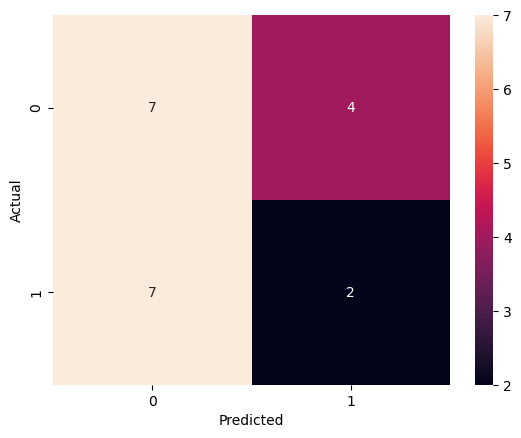

In [28]:
conf_mat = pd.crosstab(y_test,y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat,annot=True)

In [29]:
# 3 Decision Tree Classifier
x = df.drop(columns = ['residual sugar','Id'],axis = 1)
y = df['Id']
print(x)
print(y)

    fixed acidity  volatile acidity  citric acid  chlorides  \
0             7.4             0.700         0.00      0.076   
1             7.8             0.880         0.00      0.098   
2             7.8             0.760         0.04      0.092   
3            11.2             0.280         0.56      0.075   
4             7.4             0.700         0.00      0.076   
..            ...               ...          ...        ...   
94            7.2             0.415         0.36      0.081   
95            8.4             0.745         0.11      0.090   
96            5.2             0.340         0.00      0.050   
97            6.3             0.390         0.08      0.066   
98            5.2             0.340         0.00      0.050   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11                    34   0.9978  3.51       0.56   
1                    25                    67   0.9968  3.20       0.68   
2                 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=500)
x_train, x_test, y_train, y_test 

(    fixed acidity  volatile acidity  citric acid  chlorides  \
 49            7.7             0.690         0.22      0.084   
 63            7.9             0.520         0.26      0.079   
 26            7.8             0.600         0.14      0.086   
 36            6.6             0.500         0.04      0.068   
 12            8.5             0.280         0.56      0.092   
 ..            ...               ...          ...        ...   
 78            8.4             0.620         0.09      0.084   
 17            6.9             0.400         0.14      0.085   
 65            7.7             0.490         0.26      0.062   
 55            6.2             0.450         0.20      0.069   
 90            8.0             0.745         0.56      0.118   
 
     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 49                   18                    94   0.9961  3.31       0.48   
 63                   42                   140   0.9964  3.23       0.54   
 2

In [31]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,)

(79, 11) (20, 11) (79,) (20,)


In [32]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('y_pred:',y_pred)

y_pred: [0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0]


In [33]:
# Evaluation Metrics
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage :',int(Accuracy_score*100),'%')

Confusion Matrix : [[7 3]
 [6 4]]
Accuracy Score : 0.55
Accuracy in Percentage : 55 %


<Axes: xlabel='Predicted', ylabel='Actual'>

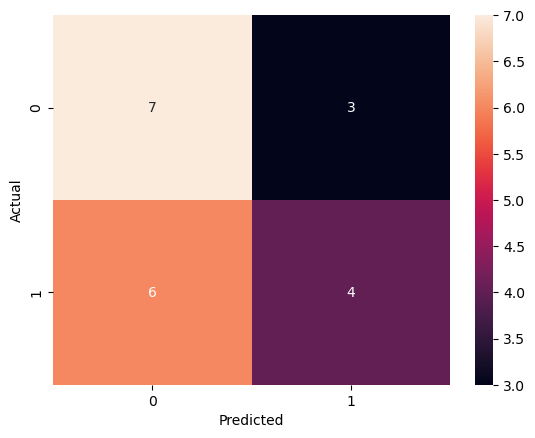

In [34]:
conf_mat = pd.crosstab(y_test, y_pred,rownames=['Actual'],colnames = ['Predicted'])
sns.heatmap(conf_mat,annot = True)

In [35]:
# 4 Random Forest
x = df.drop(columns = ['residual sugar','Id'],axis = 1)
y = df['Id']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.transform(x_test)

In [38]:
model = RandomForestClassifier(n_estimators=10,criterion = 'entropy',random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [39]:
print('Random Forest Classifier')
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage :', int (Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[5 5]
 [5 5]]
Accuracy Score : 0.5
Accuracy in Percentage : 50 %

               precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



[Text(0.5, 1.0, 'Random Forest Classifier')]

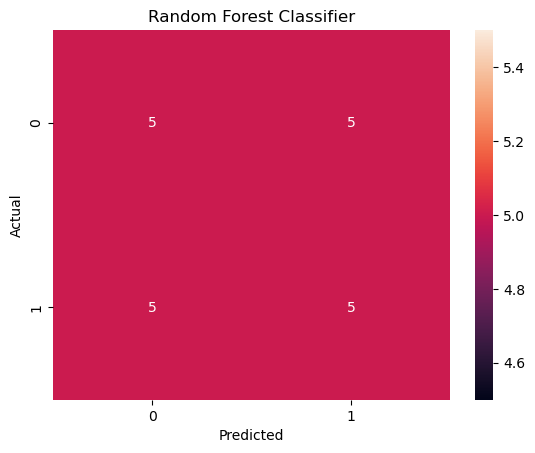

In [40]:
conf_mat = pd.crosstab(y_test,y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(conf_mat, annot = True).set(title = 'Random Forest Classifier')

In [41]:
# 6 K Nearest Neighbors
x = df.drop(columns = ['residual sugar','Id'],axis = 1)
y = df['Id']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
results=[]
for i in [1,2,3,4,5]:
    model = KNeighborsClassifier(n_neighbors=i,metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Accuracy_score = metrics.accuracy_score(y_test,y_pred)
    results.append(Accuracy_score)
print('KNN[minkowski]')
print('for n_neighbor =5:')
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion matrix :',conf_mat)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage :', int (Accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))
print(results)

KNN[minkowski]
for n_neighbor =5:

 Confusion matrix : [[7 9]
 [9 5]]
Accuracy Score : 0.4
Accuracy in Percentage : 40 %

               precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.36      0.36      0.36        14

    accuracy                           0.40        30
   macro avg       0.40      0.40      0.40        30
weighted avg       0.40      0.40      0.40        30

[0.5, 0.4666666666666667, 0.43333333333333335, 0.4, 0.4]


[Text(0.5, 1.0, 'KNN[minkowski,neighbor=5]')]

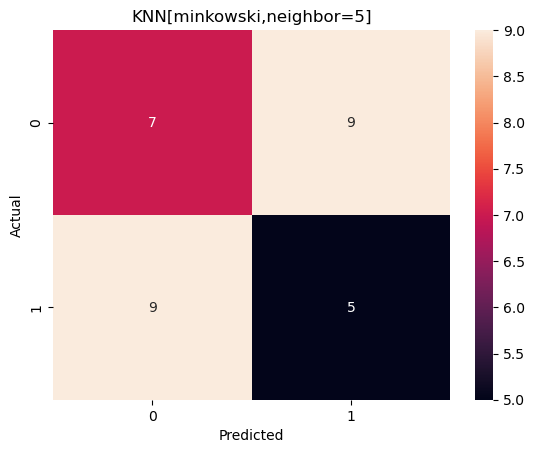

In [45]:
conf_mat = pd.crosstab(y_test,y_pred,rownames =['Actual'],colnames =['Predicted'])
sns.heatmap(conf_mat, annot=True).set(title ='KNN[minkowski,neighbor=5]')

In [46]:
models = pd.DataFrame({
    'n_neighbors' :['1','2','3','4','5'],
    'Accuracy Score' : [results[0],results[1],results[2],results[3],results[4]]})
models.sort_values(by='Accuracy Score')
print(models.to_string(index=False))

n_neighbors  Accuracy Score
          1        0.500000
          2        0.466667
          3        0.433333
          4        0.400000
          5        0.400000


In [47]:
# 7 Support Vector Machine
x = df.drop(columns = ['residual sugar','Id'],axis = 1)
y = df['Id']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=500)
x_train, x_test, y_train, y_test

(    fixed acidity  volatile acidity  citric acid  chlorides  \
 49            7.7             0.690         0.22      0.084   
 63            7.9             0.520         0.26      0.079   
 26            7.8             0.600         0.14      0.086   
 36            6.6             0.500         0.04      0.068   
 12            8.5             0.280         0.56      0.092   
 ..            ...               ...          ...        ...   
 78            8.4             0.620         0.09      0.084   
 17            6.9             0.400         0.14      0.085   
 65            7.7             0.490         0.26      0.062   
 55            6.2             0.450         0.20      0.069   
 90            8.0             0.745         0.56      0.118   
 
     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 49                   18                    94   0.9961  3.31       0.48   
 63                   42                   140   0.9964  3.23       0.54   
 2

In [49]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
model = SVC(kernel ='rbf',random_state=0)
model.fit(x_train,y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction :',svc_prediction)

svc_prediction : [0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]


In [51]:
conf_mat = metrics.confusion_matrix(y_test,svc_prediction)
print('SVC[kernerl - rbf]')
print('Confusion Matrix :\n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage :',int(Accuracy_score*100),'%')
print(classification_report(svc_prediction,y_test))

SVC[kernerl - rbf]
Confusion Matrix :
 [[7 3]
 [9 1]]
Accuracy Score : 0.4
Accuracy in Percentage : 40 %
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        16
           1       0.10      0.25      0.14         4

    accuracy                           0.40        20
   macro avg       0.40      0.34      0.34        20
weighted avg       0.58      0.40      0.46        20



In [52]:
# 8 K Means Clustering (Unsupervised Learning)

x = df.iloc[:,[2,4]].values

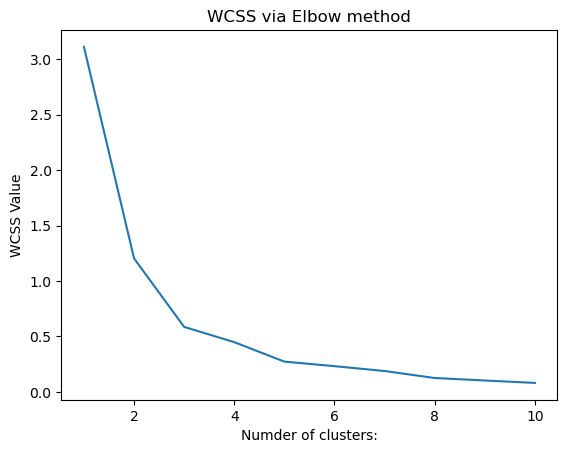

In [53]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state =21)
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Numder of clusters:')
plt.ylabel('WCSS Value')
plt.show()

In [54]:
# K-Means Clustering Training on Training set
model = KMeans (n_clusters=3,init='k-means++',random_state=42)
y_means = model.fit_predict(x)
print('y means:\n\n',y_means)

y means:

 [1 1 1 2 1 1 1 1 1 1 1 0 2 2 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 2 0 1 1
 0 1 2 0 0 2 2 1 1 1 1 1 0 0 2 1 1 0 0 2 2 1 0 0 2 1 0 0 0 1 1 1 0 0 0 0 0
 0 2 0 0 1 2 0 0 0 1 1 1 0 1 1 0 2 1 1 1 0 1 1 1 1]
